In [41]:
#######################Tensorflow 코드 시작부분
import librosa
import pyaudio #마이크를 사용하기 위한 라이브러리
import wave
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, Model
from sklearn.model_selection import train_test_split
import os

##### 변수 설정 부분 #####
FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 44100 #비트레이트 설정
CHUNK = int(RATE / 10) # 버퍼 사이즈 1초당 44100비트레이트 이므로 100ms단위
RECORD_SECONDS = 5 #녹음할 시간 설정
WAVE_OUTPUT_FILENAME = "output.wav"
DATA_PATH = "./data/"
X_train = []#train_data 저장할 공간
X_test = []
Y_train = []
Y_test = []
tf_classes = 0

def load_wave_generator(path):

    batch_waves = []
    labels = []
    X_data = []
    Y_label = []
    global X_train, X_test, Y_train, Y_test, tf_classes

    folders = os.listdir(path)

    for folder in folders:
        if not os.path.isdir(path):continue #폴더가 아니면 continue
        files = os.listdir(path+"/"+folder)
        print("Foldername :",folder,"-",len(files),"files")
        #폴더 이름과 그 폴더에 속하는 파일 갯수 출력
        for wav in files:
            if not wav.endswith(".wav"):continue
            else:
                #print("Filename :",wav)#.wav 파일이 아니면 continue
                y, sr = librosa.load(path+"/"+folder+"/"+wav)
                mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=50, hop_length=int(sr*0.01),n_fft=int(sr*0.02)).T  
                #n_mfcc 20~50 사이 사용, hop_length, n_fft, .T 의미 불명...
                #50으로 해도 val_acc 91%... 시간이 너무 오래걸린다.
                X_data.extend(mfcc)
                #print("MFCC Size : ", len(mfcc))

                label = [0 for i in range(len(folders))]
                label[tf_classes] = 1

                for i in range(len(mfcc)):
                    Y_label.append(label)
        tf_classes = tf_classes+1
    #end loop
    print("X_data :",np.shape(X_data))
    print("Y_label :",np.shape(Y_label))
    X_train, X_test, Y_train, Y_test = train_test_split(np.array(X_data), np.array(Y_label))     #데이터를 섞어서 나누어준다.

    xy = (X_train, X_test, Y_train, Y_test)
    np.save("./data.npy",xy)

print("Start FIle Reading")
load_wave_generator(DATA_PATH)

print(tf_classes," classes!!")
print("X_train :",np.shape(X_train))
print("Y_train :",np.shape(Y_train))
print("X_test :",np.shape(X_test))
print("Y_test :",np.shape(Y_test))

Start FIle Reading
Foldername : 0 - 20 files
Foldername : 1 - 20 files
Foldername : 2 - 20 files
Foldername : 3 - 20 files
Foldername : 4 - 20 files
Foldername : 5 - 20 files
Foldername : 6 - 20 files
Foldername : 7 - 20 files
X_data : (94610, 50)
Y_label : (94610, 8)
8  classes!!
X_train : (70957, 50)
Y_train : (70957, 8)
X_test : (23653, 50)
Y_test : (23653, 8)


In [42]:
print(X_train[0])
print(Y_train[0])
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

[-3.33225494e+02  8.73870087e+01  6.20081406e+01  7.71303558e+01
  7.95318413e+00 -3.01450043e+01  1.82769737e+01 -1.71459503e+01
 -1.62600155e+01 -3.58981628e+01  1.36370325e+01 -1.03480740e+01
 -2.72239637e+00  1.84204464e+01 -3.27201347e+01  8.19599867e-01
 -2.57262383e+01  4.98209000e+00 -1.00250874e+01 -1.05411186e+01
 -6.41016388e+00 -1.39782410e+01  1.29339657e+01 -8.03871918e+00
 -2.19010532e-01 -1.00574303e+01 -1.27879620e+01  5.94979763e+00
 -1.47964029e+01  6.55685663e-02 -2.10323639e+01  1.14708531e+00
  1.05862021e-01 -2.06554546e+01  1.91690087e-01  6.68910789e+00
  1.64191780e+01  8.24869633e+00  1.17919292e+01  1.00175514e+01
 -4.78815031e+00  6.92057133e-01 -1.00707073e+01  8.52055836e+00
 -1.10320234e+01  3.06187677e+00  5.76412868e+00 -1.66756177e+00
 -1.08899384e+01 -2.43438387e+00]
[1 0 0 0 0 0 0 0]
(70957, 50)
(70957, 8)
(23653, 50)
(23653, 8)


In [45]:
X_train, X_test, Y_train, Y_test = np.load("./data.npy", allow_pickle=True)
X_train = X_train.astype("float")
X_test = X_test.astype("float")


class MyModel(tf.keras.Model):             #모델 클래스 선언
                                            #GRU, LSTM은 DNN과 혼용 불가..?
    def __init__(self):
        super(MyModel,self).__init__()
        self.dense1 = layers.Dense(256, activation='relu')
        self.dense2 = layers.Dense(128, activation='relu')
        self.dense3 = layers.Dense(64, activation='relu')
        self.dense4 = layers.Dense(32, activation='relu')
        self.dense5 = layers.Dense(64, activation='relu')
        self.dense6 = layers.Dense(16, activation='relu')
        self.dense7 = layers.Dense(32, activation='relu')
        self.dense8 = layers.Dense(64, activation='relu')
        self.dense9 = layers.Dense(8, activation='softmax')
        
    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.dense2(x)
        x = self.dense3(x)
        x = self.dense4(x)
        x = self.dense5(x)
        x = self.dense6(x)
        x = self.dense7(x)
        x = self.dense8(x)
        return self.dense9(x)

batch_size = 32
model = MyModel()
model.compile(optimizer='adam',
              loss='categorical_crossentropy',     #라벨이 0,1일경우 사용가능 한 loss모델
              metrics=['accuracy'])
history = model.fit(X_train, Y_train, epochs=30, batch_size=batch_size,
         validation_data = (X_test, Y_test))


print('Learning Finished!')


Epoch 1/30
2218/2218 [==============================] - 2s 905us/step - loss: 0.9041 - accuracy: 0.6739 - val_loss: 0.6150 - val_accuracy: 0.7906
Epoch 2/30
2218/2218 [==============================] - 2s 872us/step - loss: 0.5688 - accuracy: 0.8063 - val_loss: 0.4956 - val_accuracy: 0.8336
Epoch 3/30
2218/2218 [==============================] - 2s 852us/step - loss: 0.4788 - accuracy: 0.8382 - val_loss: 0.4464 - val_accuracy: 0.8464
Epoch 4/30
2218/2218 [==============================] - 2s 856us/step - loss: 0.4289 - accuracy: 0.8540 - val_loss: 0.4329 - val_accuracy: 0.8525
Epoch 5/30
2218/2218 [==============================] - 2s 858us/step - loss: 0.3914 - accuracy: 0.8657 - val_loss: 0.4326 - val_accuracy: 0.8551
Epoch 6/30
2218/2218 [==============================] - 2s 853us/step - loss: 0.3646 - accuracy: 0.8762 - val_loss: 0.3842 - val_accuracy: 0.8691
Epoch 7/30
2218/2218 [==============================] - 2s 859us/step - loss: 0.3436 - accuracy: 0.8830 - val_loss: 0.3766 -

INFO:tensorflow:Assets written to: MFCC_DNN\assets


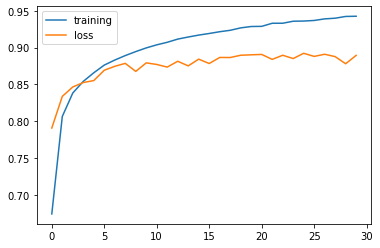

In [46]:
saver = model.save("MFCC_DNN")    #오류 날떄 안날떄 원인 불명....

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.legend(['training', 'loss'], loc = 'upper left')
plt.show()

In [36]:
y, sr = librosa.load("./test_이재은.wav")

X_test = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=50, hop_length=int(sr*0.01),n_fft=int(sr*0.02)).T

'''
0 유인나
1 배철수
2 이재은
3 최일구
4 문재인 대통령
'''
label = [0 for i in range(5)]#class가 3개이니까 y_test만드는 과정
label[2] = 1
Y_test = []
for i in range(len(X_test)):
    Y_test.append(label)

print(np.shape(X_test))
print(np.shape(Y_test))

pridict = model.predict(X_test)
rst = [0,0,0,0,0,0,0,0]
for i in range(len(pridict)):
    rst[np.argmax(pridict[i])] = rst[np.argmax(pridict[i])] +1
print(rst)
accuracy = (rst[2]/len(pridict))*100
print("accuracy is ", accuracy)

(502, 50)
(502, 5)
[0, 1, 495, 1, 5, 0, 0, 0]
accuracy is  98.60557768924303


In [37]:
y, sr = librosa.load("./test_유인나1.wav")

X_test = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=50, hop_length=int(sr*0.01),n_fft=int(sr*0.02)).T

'''
0 유인나
1 배철수
2 이재은
3 최일구
4 문재인 대통령
'''
label = [0 for i in range(5)]#class가 3개이니까 y_test만드는 과정
label[2] = 1
Y_test = []
for i in range(len(X_test)):
    Y_test.append(label)

print(np.shape(X_test))
print(np.shape(Y_test))

pridict = model.predict(X_test)
rst = [0,0,0,0,0,0]
for i in range(len(pridict)):
    rst[np.argmax(pridict[i])] = rst[np.argmax(pridict[i])] +1
print(rst)
accuracy = (rst[0]/len(pridict))*100
print("accuracy is ", accuracy)

(502, 50)
(502, 5)
[416, 32, 31, 11, 11, 1]
accuracy is  82.86852589641434


In [40]:
y, sr = librosa.load("./test_유인나2.wav")

X_test = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=, hop_length=int(sr*0.01),n_fft=int(sr*0.02)).T

'''
0 유인나
1 배철수
2 이재은
3 최일구
4 문재인 대통령
'''
label = [0 for i in range(5)]#class가 3개이니까 y_test만드는 과정
label[2] = 1
Y_test = []
for i in range(len(X_test)):
    Y_test.append(label)

print(np.shape(X_test))
print(np.shape(Y_test))

pridict = model.predict(X_test)
rst = [0,0,0,0,0,0]
for i in range(len(pridict)):
    rst[np.argmax(pridict[i])] = rst[np.argmax(pridict[i])] +1
print(rst)
accuracy = (rst[0]/len(pridict))*100
print("accuracy is ", accuracy)

(502, 50)
(502, 5)
[487, 10, 2, 1, 2, 0]
accuracy is  97.01195219123507


In [38]:
y, sr = librosa.load("./test_배철수.wav")

X_test = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=50, hop_length=int(sr*0.01),n_fft=int(sr*0.02)).T

'''
0 유인나
1 배철수
2 이재은
3 최일구
4 문재인 대통령
'''
label = [0 for i in range(5)]#class가 3개이니까 y_test만드는 과정
label[2] = 1
Y_test = []
for i in range(len(X_test)):
    Y_test.append(label)

print(np.shape(X_test))
print(np.shape(Y_test))

pridict = model.predict(X_test)
rst = [0,0,0,0,0,0]
for i in range(len(pridict)):
    rst[np.argmax(pridict[i])] = rst[np.argmax(pridict[i])] +1
print(rst)
accuracy = (rst[1]/len(pridict))*100
print("accuracy is ", accuracy)

(502, 50)
(502, 5)
[4, 450, 12, 14, 16, 6]
accuracy is  89.64143426294821


In [39]:
y, sr = librosa.load("./test_문재인대통령.wav")

X_test = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=50, hop_length=int(sr*0.01),n_fft=int(sr*0.02)).T

'''
0 유인나
1 배철수
2 이재은
3 최일구
4 문재인 대통령
'''
label = [0 for i in range(5)]#class가 3개이니까 y_test만드는 과정
label[2] = 1
Y_test = []
for i in range(len(X_test)):
    Y_test.append(label)

print(np.shape(X_test))
print(np.shape(Y_test))

pridict = model.predict(X_test)
rst = [0,0,0,0,0,0]
for i in range(len(pridict)):
    rst[np.argmax(pridict[i])] = rst[np.argmax(pridict[i])] +1
print(rst)
accuracy = (rst[4]/len(pridict))*100
print("accuracy is ", accuracy)

(502, 50)
(502, 5)
[2, 23, 8, 23, 432, 14]
accuracy is  86.05577689243027
